# K-Nearest Neighbors 

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thiện lab nà,y bạn sẽ có thể:

-   Sử dụng K-Nearest neighbors để phân loại dữ liệu


Trong lab này, bạn sẽ load tập dữ liệu khách hàng, điều chỉnh dữ liệu và sử dụng K-Nearest Neighbors để dự đoán một điểm dữ liệu. Vậy **K-Nearest Neighbors** là gì?


**K-Nearest Neighbors** là một thuật toán cho việc học có giám sát (supervised learning). Nơi dữ liệu được 'huấn luyện' với các điểm dữ liệu tương ứng với phân loại của chúng. Khi một điểm được dự đoán, nó sẽ tính đến 'K' điểm gần nhất với nó để xác định phân loại.


### Đây là hình ảnh trực quan của thuật toán K-Nearest Neighbors.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


Trong trường hợp này, chúng ta có các điểm dữ liệu của Lớp A và B. Chúng ta muốn dự đoán ngôi sao (điểm dữ liệu thử nghiệm) là gì. Nếu chúng ta xem xét giá trị k là 3 (3 điểm dữ liệu gần nhất) sẽ thu được dự đoán của Lớp B. Tuy nhiên, nếu chúng ta xem xét giá trị k là 6 thì thu được dự đoán của Lớp A.


Theo nghĩa này, điều quan trọng là phải xem xét giá trị của k. Nhưng hy vọng từ đồ thị này, bạn sẽ hiểu được thuật toán K-Nearest Neighbors là gì. Nó xem xét 'K' Nearest Neighbors (điểm) khi nó dự đoán phân loại của điểm kiểm tra.


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Về tập dữ liệu</a></li>
        <li><a href="#visualization_analysis">Trực quan hóa và phân tích dữ liệu</a></li>
        <li><a href="#classification">Phân loại</a></li>
    </ol>
</div>
<br>
<hr>


Hãy imort các thư viện cần thiết


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>Về tập dữ liệu</h2>
</div>


Hãy tưởng tượng một nhà cung cấp dịch vụ viễn thông đã phân khúc cơ sở khách hàng của mình theo các hình thức sử dụng dịch vụ, phân loại khách hàng thành 4 nhóm. Nếu có thể sử dụng dữ liệu nhân khẩu học để dự đoán thành viên nhóm, công ty có thể tùy chỉnh các đề nghị cho từng khách hàng tiềm năng. Đó là một bài toán phân loại. Có nghĩa là, với tập dữ liệu, với các nhãn được xác định trước, chúng ta cần xây dựng một mô hình để đoán lớp của một trường hợp mới hoặc chưa biết.

Ví dụ này tập trung vào việc sử dụng dữ liệu nhân khẩu học, chẳng hạn như vùng miền, độ tuổi và hôn nhân, để dự đoán các mẫu sử dụng.

Trường mục tiêu **custcat** có 4 giá trị khả thi tương ứng với 4 nhóm khách hàng như sau:
   1- Dịch vụ cơ bản
   2- Dịch vụ điện tử
   3- Dịch vụ cộng thêm
   4- Dịch vụ tổng thể

Mục tiêu của chúng ta là xây dựng một bộ phân loại để dự đoán lớp của các trường hợp chưa biết. Chúng ta sẽ sử dụng một kiểu phân loại cụ thể là K nearest neighbor.


### Load dữ liệu từ Tệp CSV


In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Trực quan hóa và Phân tích Dữ liệu</h2> 
</div>


#### Hãy xem có bao nhiêu lớp trong tập dữ liệu của chúng ta


In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 khách hàng Dịch vụ Cộng thêm, 266 khách hàng Dịch vụ cơ bản, 236  khách hàng Dịch vụ Tổng thể và 217 khách hàng Dịch vụ Điện tử

Bạn có thể dễ dàng khám phá dữ liệu của mình bằng các kỹ thuật trực quan hóa:


array([[<AxesSubplot: title={'center': 'income'}>]], dtype=object)

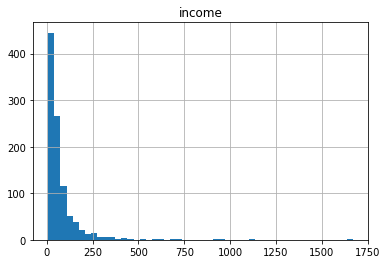

In [9]:
df.hist(column='income', bins=50)

### Tập thuộc tính


Hãy định nghĩa các tập thuộc tính, X:


In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Để sử dụng thư viện scikit-learning, chúng ta phải chuyển đổi khung dữ liệu Pandas thành mảng Numpy:


In [16]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Các nhãn của chúng ta là gì?


In [17]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Chuẩn hóa dữ liệu


Chuẩn hóa dữ liệu cung cấp cho dữ liệu có giá trị trung bình bằng 0 và phương sai đơn vị, đó là một phương pháp hay, đặc biệt là đối với các thuật toán như KNN dựa trên khoảng cách của các trường hợp:


In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train/Test Split

Độ chính xác ngoài mẫu là phần trăm dự đoán đúng mà mô hình đưa ra trên dữ liệu mà mô hình CHƯA được huấn luyện. Thực hiện một train và test trên cùng một tập dữ liệu rất có thể sẽ có độ chính xác ngoài mẫu thấp, do khả năng quá khớp.

Điều quan trọng là các mô hình của chúng ta phải có độ chính xác cao, không nằm ngoài mẫu, vì mục đích của bất kỳ mô hình nào, là đưa ra các dự đoán chính xác trên dữ liệu chưa biết. Vậy làm thế nào để cải thiện độ chính xác ngoài mẫu? Có một cách là sử dụng phương pháp đánh giá được gọi là Train/Test Split.
Train/Test Split liên quan đến việc chia nhỏ tập dữ liệu thành training set và test set tương ứng, loại trừ lẫn nhau. Sau đó, bạn huấn luyện với training set và kiểm tra với test set.

Điều này sẽ cho đánh giá chính xác hơn về độ chính xác ngoài mẫu vì tập dữ liệu thử nghiệm không phải là một phần của tập dữ liệu đã được sử dụng để huấn luyện dữ liệu. Nó thực tế hơn đối với các vấn đề trong thực tế.


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Phân loại</h2>
</div>


<h3>K nearest neighbors (KNN)</h3>


#### Import thư viện


Bộ phân loại thực hiện lựa chọn k-nearest neighbors.


In [20]:
from sklearn.neighbors import KNeighborsClassifier

### Huấn luyện

Hiện tại hãy bắt đầu thuật toán với k = 4:


In [21]:
k = 4
# Huấn luyện mô hình và dự đoán
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Dự đoán

Chúng ta có thể sử dụng mô hình để dự đoán test set:


In [22]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Đánh giá độ chính xác

Trong phân loại đa nhãn, **accuracy classification score** (hệ số phân loại độ chính xác) là một hàm tính toán độ chính xác của tập hợp con. Hàm này bằng với hàm jaccard_score. Về cơ bản, nó tính toán độ trùng khớp giữa các nhãn thực tế và nhãn dự đoán trong test set.


In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Thực hành

Bạn có thể xây dựng lại mô hình, nhưng lần này là với k = 6 không?


In [26]:
k = 6
# Huấn luyện mô hình và dự đoán
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


<details><summary>Click vào đây để xem lời giải</summary>

```python
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

```

</details>


#### Vậy còn K khác thì sao?

K trong KNN là số nearest neighbor để kiểm tra. Nó phải được chỉ định bởi Người dùng. Vì vậy, làm thế nào để có thể chọn đúng giá trị cho K?
Giải pháp chung là dành một phần dữ liệu của bạn để kiểm tra độ chính xác của mô hình. Sau đó, chọn k = 1, sử dụng phần huấn luyện để lập mô hình và tính toán độ chính xác của dự đoán bằng cách sử dụng tất cả các mẫu trong bộ test set. Lặp lại quá trình này, tăng k và xem k nào là phù hợp nhất cho mô hình của bạn.

Chúng ta có thể tính độ chính xác của KNN cho các K khác nhau.


In [30]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # Huấn luyện mô hình và dự đoán
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315])

#### Độ chính xác của mô hình đồ thị cho số lượng neighbor khác nhau


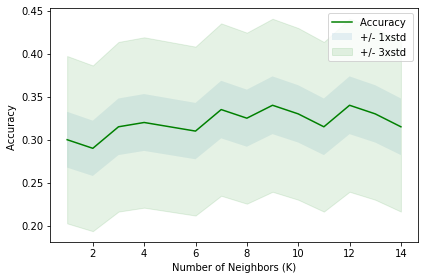

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**